## For dataset1 

In [2]:
import pandas as pd
df = pd.read_csv('dataset1.csv')
df

,company,job_position,degree,salary_more_than_100k
0,Google,Software Engineer,Masters,1
1,Amazon,Data Scientist,PhD,1
2,Microsoft,System Administrator,Associates,0
3,Facebook,Product Manager,Bachelors,1
4,Apple,Marketing Specialist,Bachelors,0
...,...,...,...,...
95,Google,Performance Engineer,Masters,1
96,Amazon,AI Model Trainer,PhD,1
97,Microsoft,Technical Analyst,Bachelors,0
98,Facebook,Support Specialist,Bachelors,0


In [3]:
inputs = df.drop('salary_more_than_100k', axis='columns')
target = df['salary_more_than_100k']

In [4]:
target

0     1
1     1
2     0
3     1
4     0
     ..
95    1
96    1
97    0
98    0
99    0
Name: salary_more_than_100k, Length: 100, dtype: int64

In [5]:
inputs

,company,job_position,degree
0,Google,Software Engineer,Masters
1,Amazon,Data Scientist,PhD
2,Microsoft,System Administrator,Associates
3,Facebook,Product Manager,Bachelors
4,Apple,Marketing Specialist,Bachelors
...,...,...,...
95,Google,Performance Engineer,Masters
96,Amazon,AI Model Trainer,PhD
97,Microsoft,Technical Analyst,Bachelors
98,Facebook,Support Specialist,Bachelors


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job_position'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs.head()

,company,job_position,degree,company_n,job_n,degree_n
0,Google,Software Engineer,Masters,3,67,2
1,Amazon,Data Scientist,PhD,0,20,3
2,Microsoft,System Administrator,Associates,4,75,0
3,Facebook,Product Manager,Bachelors,2,52,1
4,Apple,Marketing Specialist,Bachelors,1,41,1


In [9]:
inputs_n = inputs.drop(['company', 'job_position', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,3,67,2
1,0,20,3
2,4,75,0
3,2,52,1
4,1,41,1
...,...,...,...
95,3,47,2
96,0,1,3
97,4,81,1
98,2,74,1


In [10]:
from sklearn import tree 

In [11]:
model = tree.DecisionTreeClassifier()

In [12]:
model.fit(inputs_n, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
model.score(inputs_n, target)

1.0

In [14]:
model.predict([[3,67,2]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [15]:
model.predict([[4,75,0]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [16]:
model.predict([[3,20,2]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

## For dataset2

In [17]:
import pandas as pd
df = pd.read_csv('dataset2.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df = df.drop('PassengerId', axis='columns')


In [19]:
df = df.drop('Name', axis='columns')

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df = df.drop('SibSp', axis='columns')

In [22]:
df = df.drop('Parch', axis='columns')

In [23]:
df = df.drop('Ticket', axis='columns')

In [24]:
df = df.drop('Cabin', axis='columns')
df = df.drop('Embarked', axis='columns')

In [25]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [26]:
inputs = df.drop('Survived', axis='columns')
target = df['Survived']

In [27]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [29]:
le_pclass = LabelEncoder()
le_sex = LabelEncoder()
le_age = LabelEncoder()
le_fare = LabelEncoder()

In [30]:
inputs['pclass_n'] = le_pclass.fit_transform(inputs['Pclass'])
inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])
inputs['age_n'] = le_age.fit_transform(inputs['Age'])
inputs['fare_n'] = le_fare.fit_transform(inputs['Fare'])
inputs.head()

,Pclass,Sex,Age,Fare,pclass_n,sex_n,age_n,fare_n
0,3,male,22.0,7.2500,2,1,28,18
1,1,female,38.0,71.2833,0,0,51,207
2,3,female,26.0,7.9250,2,0,34,41
3,1,female,35.0,53.1000,0,0,47,189
4,3,male,35.0,8.0500,2,1,47,43


In [31]:
inputs_n = inputs.drop(['Pclass', 'Sex', 'Age', 'Fare'], axis='columns')
inputs_n

,pclass_n,sex_n,age_n,fare_n
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43
...,...,...,...,...
886,1,1,35,85
887,0,0,24,153
888,2,0,88,131
889,0,1,34,153


In [32]:
from sklearn import tree 

In [33]:
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
model.score(inputs_n, target)

0.9797979797979798

In [35]:
model.predict([[2,1,28,18]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [36]:
model.predict([[0,0,51,207]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [37]:
model.predict([[1,1,35,85]])

C:\Users\rashe\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Accuracy: 0.7653631284916201
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



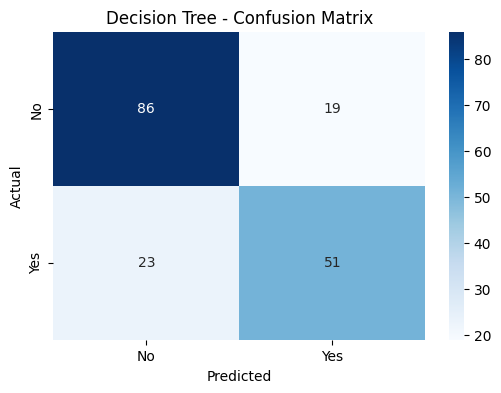

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)

# Train model
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
plt.show()


Optional: Visualize Feature Importance

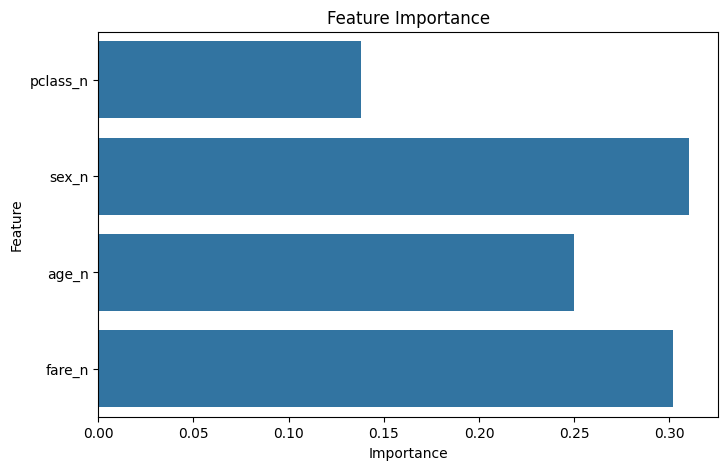

In [39]:
# Feature importance plot
importances = model.feature_importances_
feature_names = inputs_n.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


ROC Curve (Receiver Operating Characteristic)

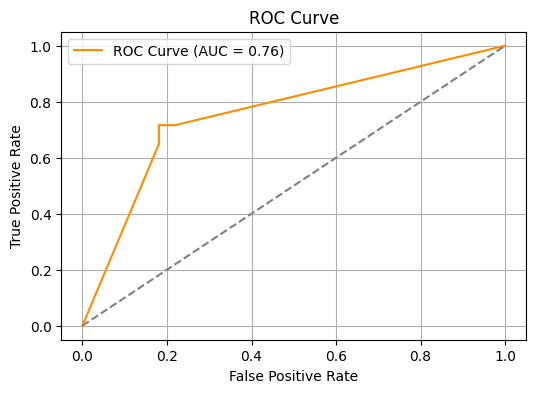

In [40]:
from sklearn.metrics import roc_curve, auc

# Get probabilities instead of binary predictions
y_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


Precision-Recall Curve

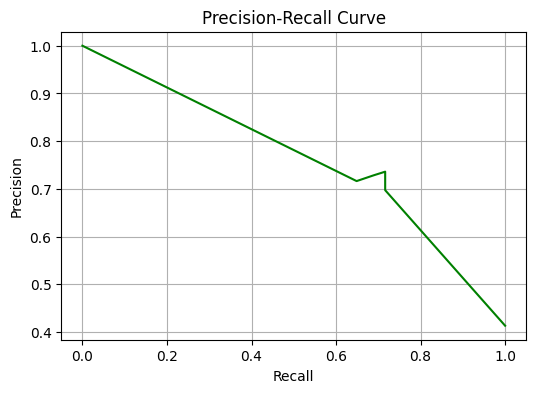

In [41]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot PR curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


Classification Report Heatmap

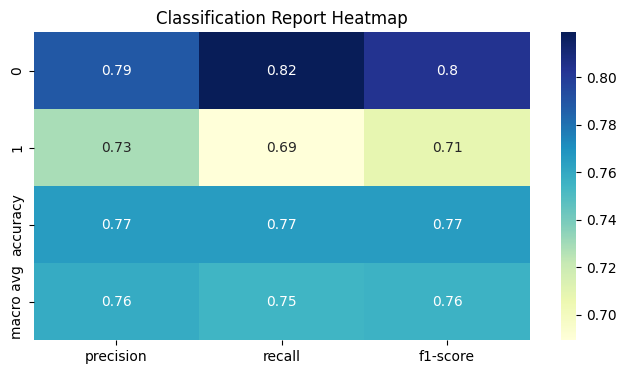

In [42]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report Heatmap')
plt.show()


Decision Tree Visualization 

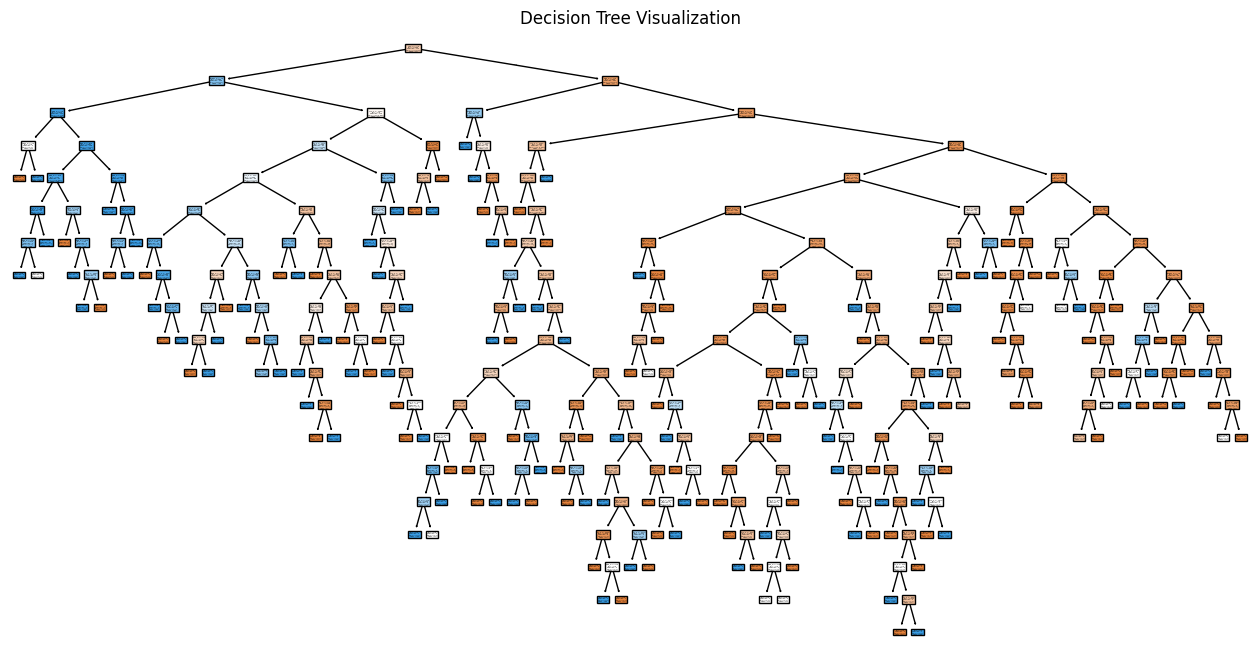

In [43]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(model, feature_names=inputs_n.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
